# 2025-01-22 FD Solutions

## Last time
* Scoping and learning strategy
* Evaluating derivatives
* Taylor series and truncation error
* Roundoff error, conditioning, and stability

## Today
* Measuring errors
* Stable discretizations
* Solutions and matrix properties

In [1]:
using Plots
default(linewidth=3)
using LinearAlgebra

# A few methods on grids

* Last time we looked at the error of the _forward difference_
* Let's try some more difference formulas

In [2]:
# These are inline functions: take arrays x and u, spit out an array of differences u' over array x.
diff1l(x, u) = x[2:end],   (u[2:end] - u[1:end-1]) ./ (x[2:end] - x[1:end-1])
diff1r(x, u) = x[1:end-1], (u[2:end] - u[1:end-1]) ./ (x[2:end] - x[1:end-1])
diff1c(x, u) = x[2:end-1], (u[3:end] - u[1:end-2]) ./ (x[3:end] - x[1:end-2])
difflist = [diff1l, diff1r, diff1c]

n = 40 
h = 2 / (n - 1)
x = LinRange(-3, 3, n)
u = sin.(x)
fig = plot(cos, xlims=(-3, 3))
for d in difflist
    xx, yy = d(x, u)
    plot!(fig, xx, yy, marker=:circle, label=d)
end

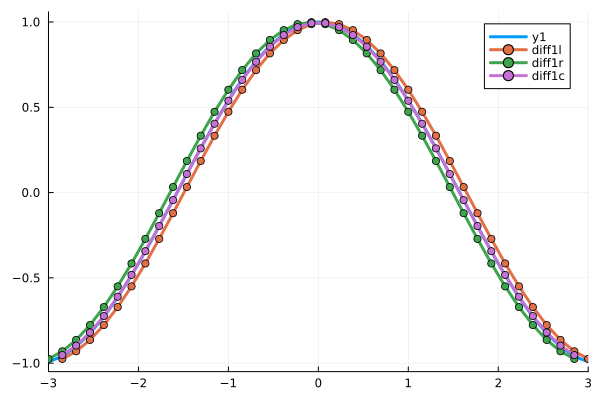

In [3]:
fig

# Measuring error on grids

It's time for an exercise.
* What does this code do?
* What property of the difference formulas (methods) are we measuring? (hint: error vs N is ?)

In [4]:
using LinearAlgebra
default(legendfontsize=12)

grids = 2 .^ (2:10) # Hint: dot operator vectorizes, so ".^" is just vectorized "^"
hs = 1 ./ grids 

function refinement_error(f, fprime, d) 
    error = []
    for n in grids
        x = LinRange(-3, 3, n)
        xx, yy = d(x, f.(x))
        push!(error, norm(yy - fprime.(xx), 2)/sqrt(n)) 
    end
    error
end

refinement_error (generic function with 1 method)

In [5]:
using LinearAlgebra
default(legendfontsize=12)

# We are measuring the CONVERGENCE of these methods

# How many gridpoints we use: 2^2, 2^3, ..., 2^10
grids = 2 .^ (2:10) 
# Grid spacing: 2^(-2), 2^(-3), ... 2^(-10)
hs = 1 ./ grids 

# We define a function to measure the convergence of these methods
# The func takes 3 arguments: `f` and `fprime` are callables (functions)
# and `d` is an array containing numerical differences (derivatives)
function refinement_error(f, fprime, d) 
    error = []
    # Loop over the grids as they get more refined
    for n in grids
        x = LinRange(-3, 3, n) 
        # Compute numerical derivative for this grid
        xx, yy = d(x, f.(x))
        # Compute error and add it to an array
        push!(error, norm(yy - fprime.(xx), 2)/sqrt(n)) # push! = add to array
    end
    # Return the array of errors
    error
end

refinement_error (generic function with 1 method)

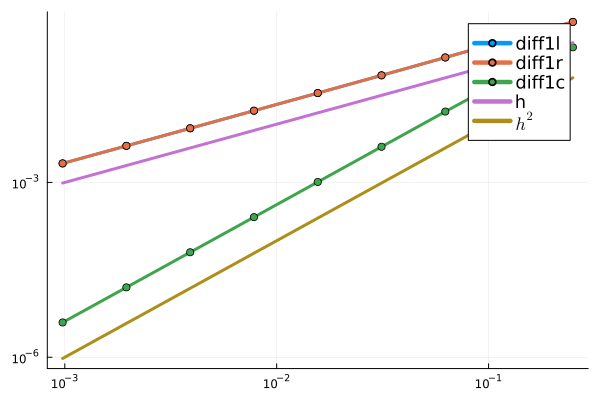

In [6]:
fig = plot(xscale=:log10, yscale=:log10)
for d in difflist
    error = refinement_error(sin, cos, d)
    plot!(fig, hs, error, marker=:circle, label=d)
end
plot!(fig, hs, [hs hs .^ 2], label=["h" "\$h^2\$"])

What happens if we use a 1-norm or 2-norm?

In [47]:
function refinement_error(f, fprime, d) 
    error = []
    for n in grids
        x = LinRange(-3, 3, n)
        xx, yy = d(x, f.(x))
        push!(error, norm(yy - fprime.(xx), 2))
    end
    error
end

refinement_error (generic function with 1 method)

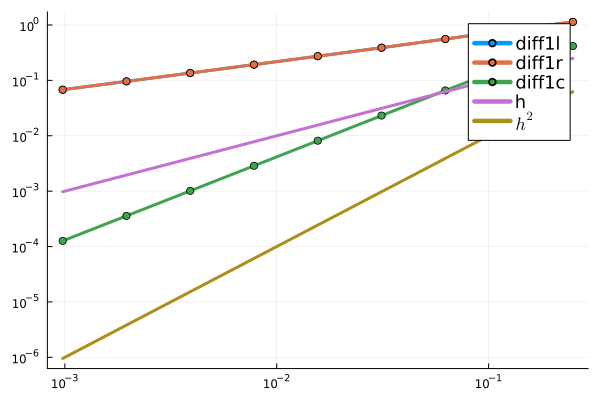

In [8]:
fig = plot(xscale=:log10, yscale=:log10)
for d in difflist
    error = refinement_error(sin, cos, d)
    plot!(fig, hs, error, marker=:circle, label=d)
end
plot!(fig, hs, [hs hs .^ 2], label=["h" "\$h^2\$"])

# Stability

* An algorithm is backwards stable if for a small _input_ rel error you get a small _output_ rel error
* = "You get a nearly correct answer to the nearly correct question"
* Are there "rough" functions for which these formulas estimate $u'(x_i) = 0$?

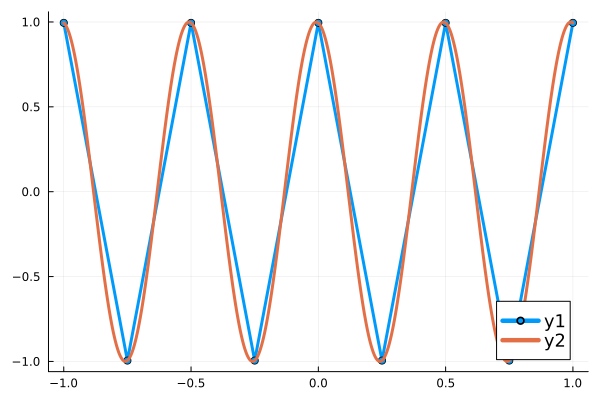

In [9]:
x = LinRange(-1, 1, 9)
f_rough(x) = cos(.1 + 4π*x)
fp_rough(x) = -4π*sin(.1 + 4π*x)

plot(x, f_rough, marker=:circle) # Sparse sampling of the function
plot!(f_rough)

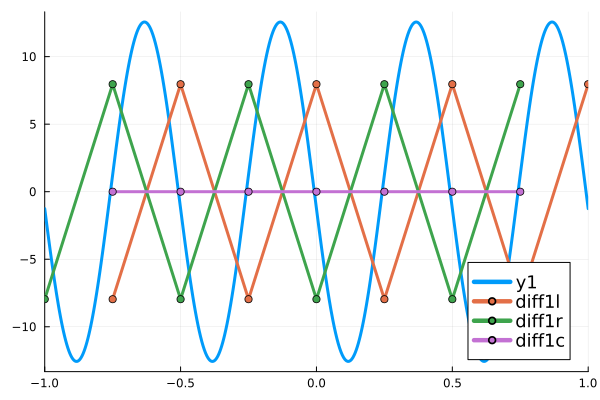

In [10]:
fig = plot(fp_rough, xlims=(-1, 1))
for d in difflist
    xx, yy = d(x, f_rough.(x))
    plot!(fig, xx, yy, label=d, marker=:circle)
end
fig

* If we have a solution $u(x)$, then $u(x) + f_{\text{rough}}(x)$ is indistinguishable to our FD method.
* Therefore, given a small input rel error, we can large output relative error.

# Consistency + Stability = Convergence

## [Lax Equivalence Theorem]

## Consistency

* When we apply the differential operator to the exact solution, we get a small residual.
* The residual converges under grid refinement.
* Hopefully fast as $h \to 0$

## Stability

* There do not exist "bad" functions that also satisfy the equation.
* The solution does not "blow up" for time-dependent problems.
* Definition here is intentionally vague, and there are more subtle requirements for problems like incompressible flow.




# Second derivatives

We can compute a second derivative by applying first derivatives twice.

In [11]:
function diff2a(x, u)
    xx, yy = diff1c(x, u)
    diff1c(xx, yy)
end

function diff2b(x, u)
    xx, yy = diff1l(x, u)
    diff1r(xx, yy)
end

diff2list = [diff2a, diff2b]
n = 20
x = LinRange(-3, 3, n)
u = - cos.(x);

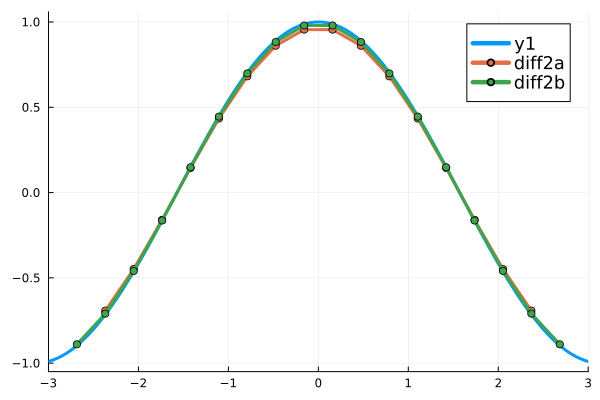

In [12]:
fig = plot(cos, xlims=(-3, 3))
for d2 in diff2list
    xx, yy = d2(x, u)
    plot!(fig, xx, yy, marker=:circle, label=d2)
end
fig

# How fast do these approximations converge?

In [48]:
grids = 2 .^ (3:10)
hs = 1 ./ grids
function refinement_error2(f, f_xx, d2)
    error = []
    for n in grids
        x = LinRange(-3, 3, n)
        xx, yy = d2(x, f.(x))
        push!(error, norm(yy - f_xx.(xx), Inf
        )) # which norm?
    end
    error
end

refinement_error2 (generic function with 1 method)

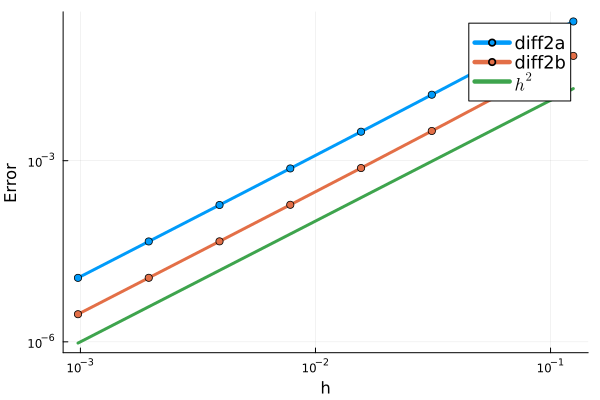

In [14]:
fig = plot(xlabel="h", xscale=:log10, ylabel="Error", yscale=:log10)
for d2 in diff2list
    error = refinement_error2(x -> -cos(x), cos, d2)
    plot!(fig, hs, error, marker=:circle, label=d2)
end
plot!(fig, hs, hs .^ 2, label="\$h^2\$") 

* Both methods are second order accurate.
* The `diff2b` method is more accurate than `diff2a` (by a factor of 4)
* The `diff2a` method can't compute derivatives at points adjacent the boundary.
* We don't know yet whether either is stable

# Differentiation matrices

* All our `diff*` functions thus far have been linear in `u`, therefore they can be represented as matrices.
$$\frac{u_{i+1} - u_i}{x_{i+1} - x_i} = \begin{bmatrix} -1/h & 1/h \end{bmatrix} \begin{bmatrix} u_i \\ u_{i+1} \end{bmatrix}$$

* More generally: 
$$\begin{bmatrix} u'(x_1) \\ u'(x_2) \\ \vdots \\ u'(x_n) \end{bmatrix} = \begin{bmatrix} D_{11} & D_{12} & \ldots & D_{1n} \\ D_{21} & D_{22} & \ldots & D_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ D_{n1} & D_{2n} & \ldots & D_{nn} \end{bmatrix} \begin{bmatrix} u(x_1) \\ u(x_2) \\ \vdots \\ u(x_n) \end{bmatrix}\quad \text{or} \quad \mathbf{u'} = \mathbf{D} \mathbf{u}$$

In [50]:
function diff1_mat(x)
    n = length(x)
    D = zeros(n, n)
    h = x[2] - x[1]
    D[1, 1:2] = [-1/h  1/h]
    for i in 2:n-1
        D[i, i-1:i+1] = [-1/2h  0  1/2h]
    end
    D[n, n-1:n] = [-1/h  1/h]
    D
end
x = LinRange(-1, 1, 5)
diff1_mat(x)

5×5 Matrix{Float64}:
 -2.0   2.0   0.0   0.0  0.0
 -1.0   0.0   1.0   0.0  0.0
  0.0  -1.0   0.0   1.0  0.0
  0.0   0.0  -1.0   0.0  1.0
  0.0   0.0   0.0  -2.0  2.0

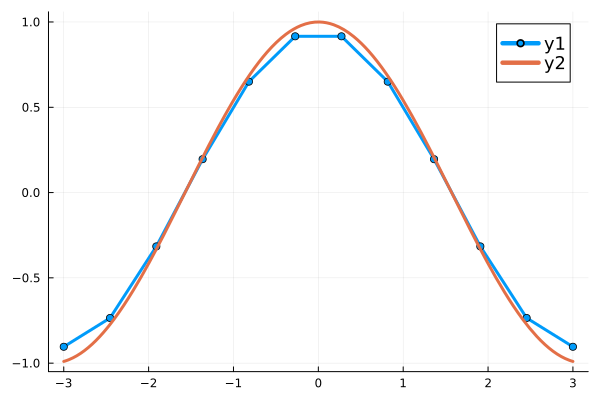

In [51]:
n = 12
x = LinRange(-3, 3, n)
plot(x, diff1_mat(x) * sin.(x), marker=:circle)
plot!(cos)

# How accurate is this derivative matrix?

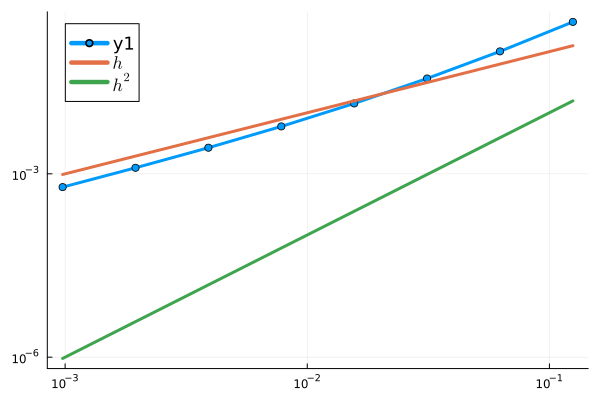

In [17]:
fig = plot(xscale=:log10, yscale=:log10, legend=:topleft)
error = refinement_error(sin, cos, (x, u) -> (x, diff1_mat(x) * u))
plot!(fig, hs, error, marker=:circle)
plot!(fig, hs, hs, label="\$h\$")
plot!(fig, hs, hs .^ 2, label="\$h^2\$")

# Can we study it as a matrix?

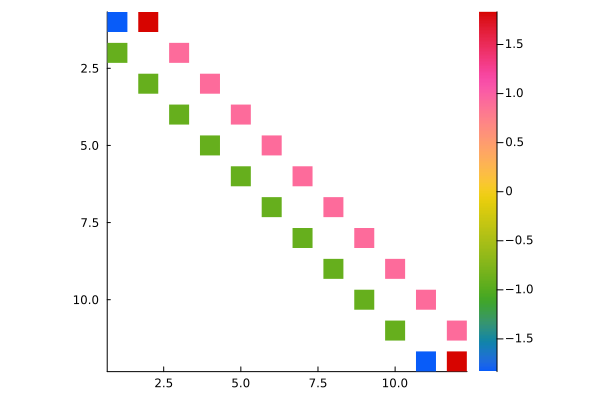

In [18]:
function my_spy(A)
    cmax = norm(vec(A), Inf)
    s = max(1, ceil(120 / size(A, 1)))
    spy(A, marker=(:square, s), c=:diverging_rainbow_bgymr_45_85_c67_n256, clims=(-cmax, cmax))
end

D = diff1_mat(x)
my_spy(D)

In [19]:
svdvals(D) # What's this?

12-element Vector{Float64}:
 2.7718000318790152
 2.7716788692501084
 1.7708640148632901
 1.732003875931066
 1.5877132402714698
 1.4519108222799693
 1.2963624321753364
 1.0397961559479483
 0.9166666666666657
 0.5413728320040285
 0.4745015826879543
 1.7546012240164312e-16

In [23]:
cond(D)

1.5797321886816708e16

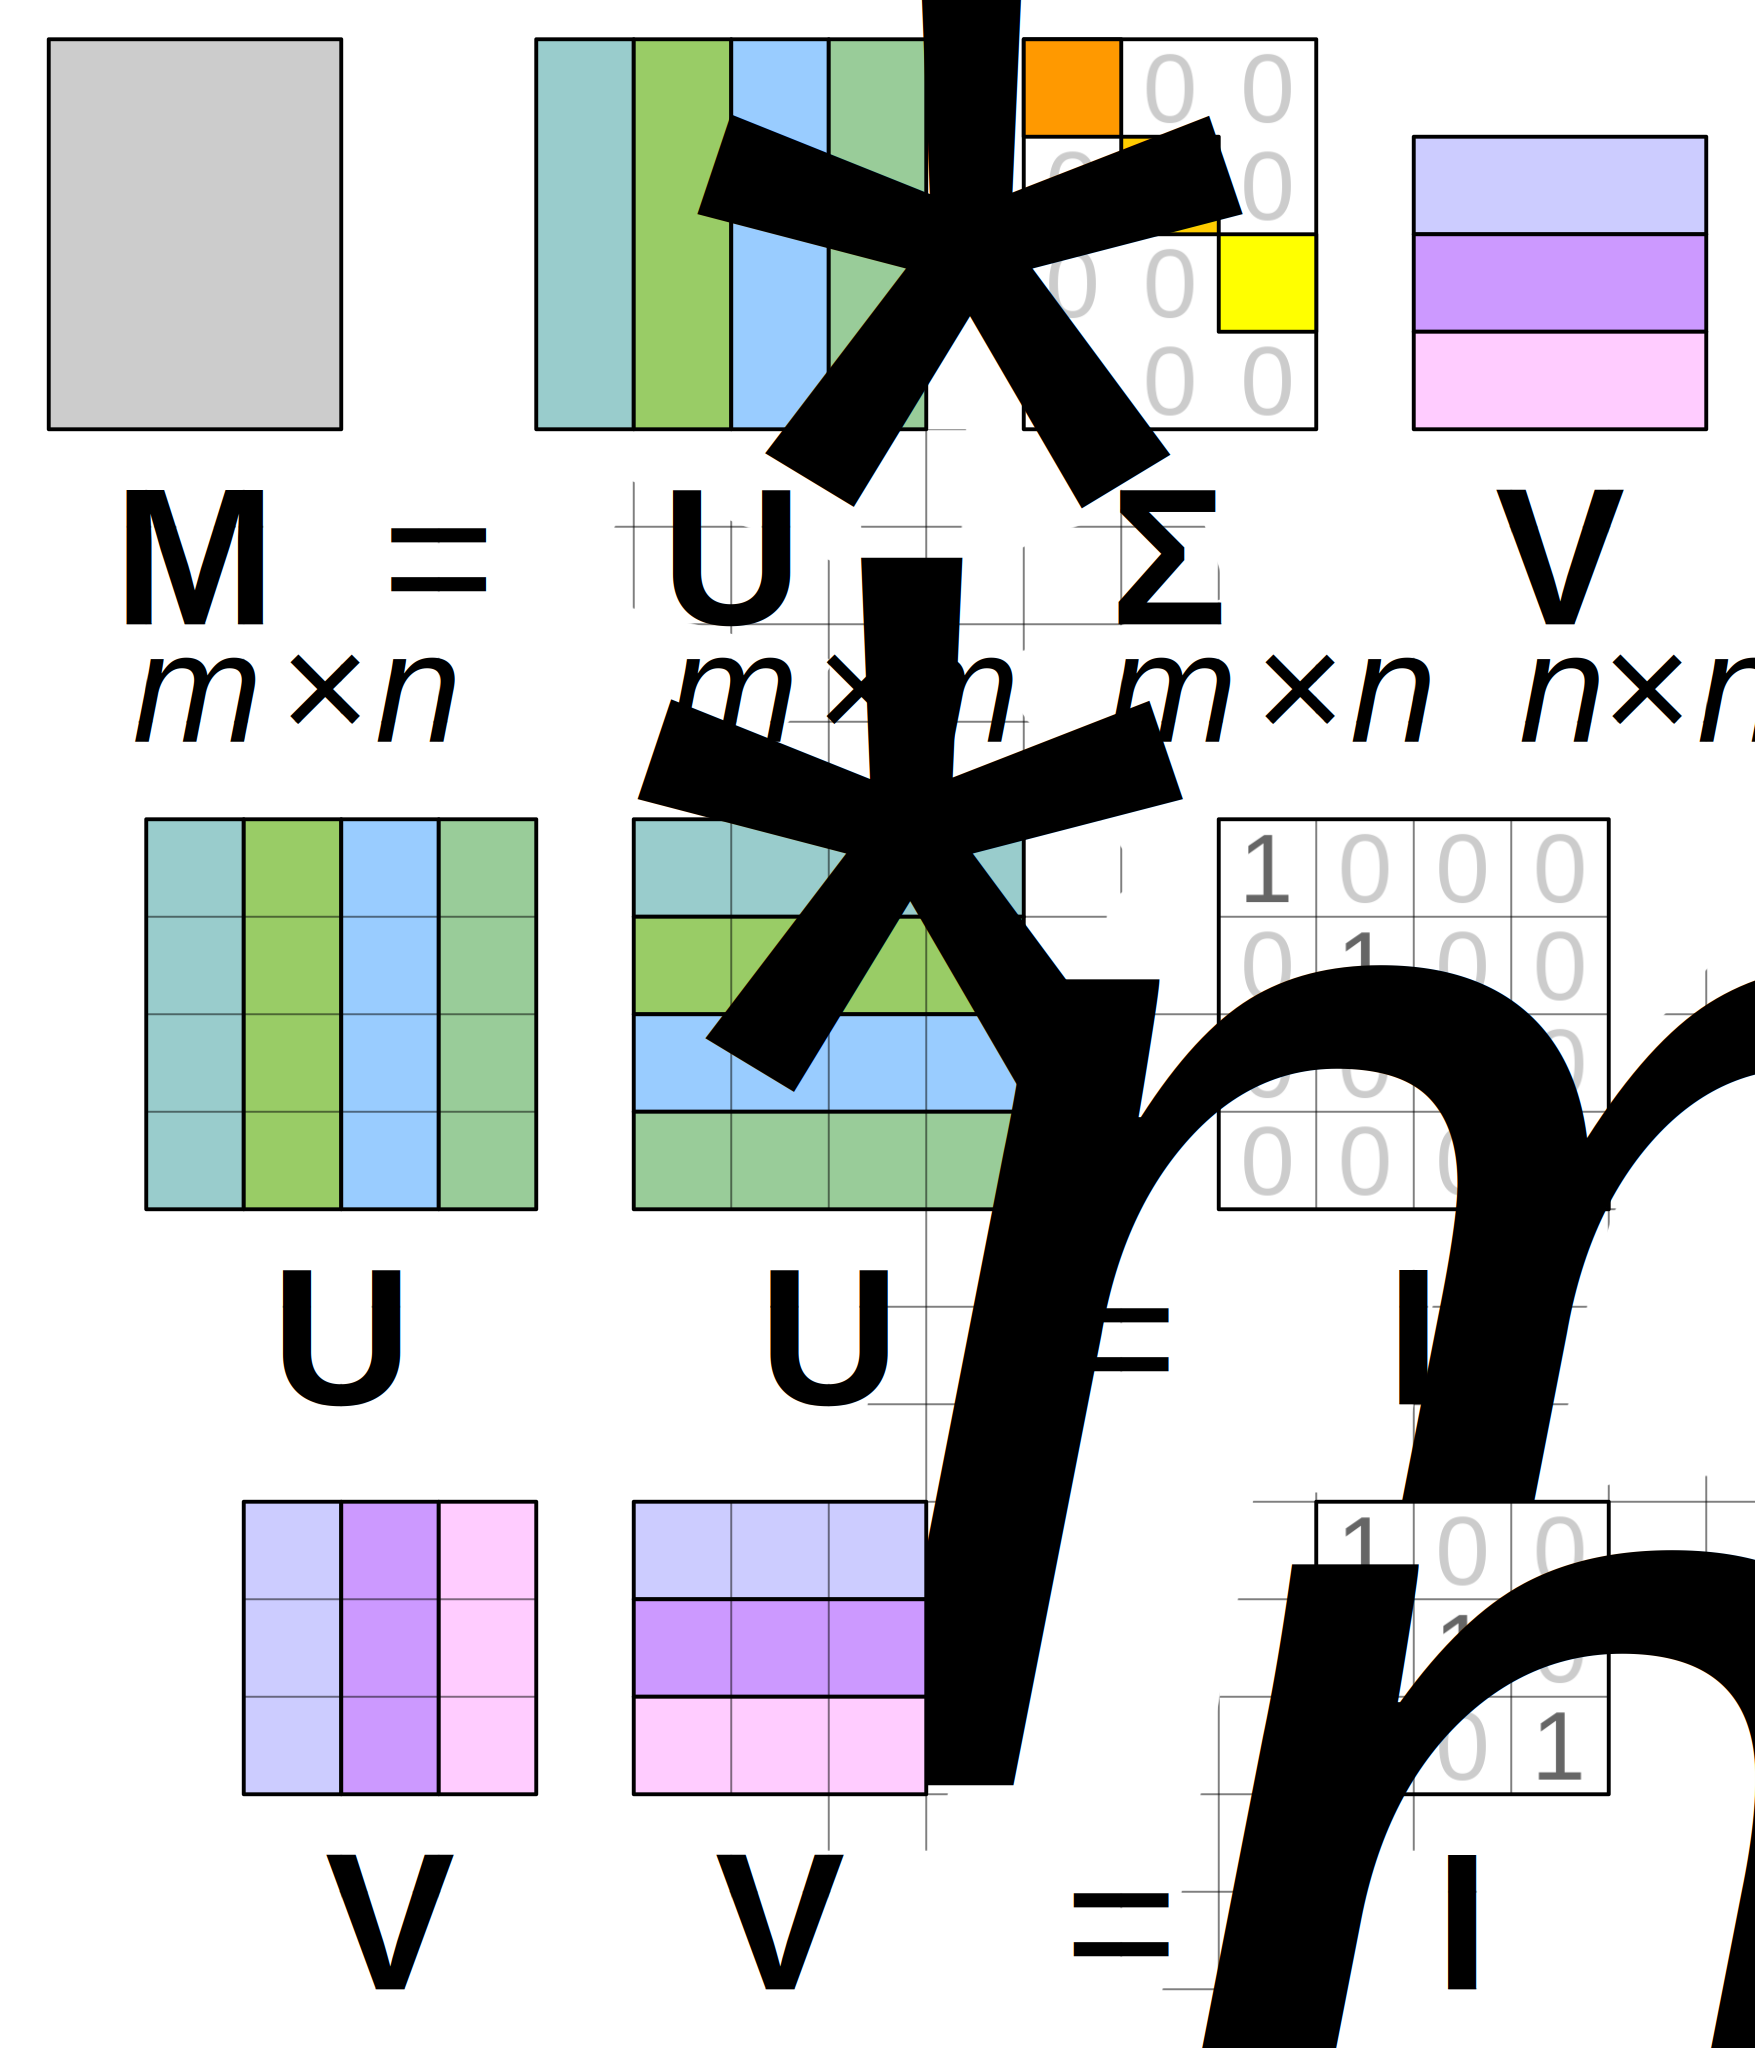

In [42]:
open("../img/svd_viz.svg") do f
   display("image/svg+xml", read(f, String))
end

# Second derivative with Dirichlet boundary conditions

\begin{gather} -\frac{d^2 u}{dx^2} = f(x) \quad x \in \Omega = (-1,1) \\
u(-1) = a \quad \frac{du}{dx}(1) = b .
\end{gather}

* Turn this into a linear system by replacing 
    * $x \to [x_1, x_2, \ldots, x_n] = \mathbf{x}$,
    * $u(x) \to [u_1, u_2, \ldots, u_n] = \mathbf{u}$,
    * $f(x) \to [f_1, f_2, \ldots, f_n] = \mathbf{f}$,
    * $\frac{d^2}{dx^2} \to \mathbf{D}^2$.
    
    $$ \mathbf{D}^2\mathbf{u} = \mathbf{f}$$
    
* How to encode left boundary condition? Discuss.

The left endpoint in our example boundary value problem has a Dirichlet boundary condition,
$$u(-1) = a . $$
With finite difference methods, we have an explicit degree of freedom $u_1 = u(x_1 = -1)$ at that endpoint.
When building a matrix system for the BVP, we can implement this boundary condition by modifying the first row of the matrix,
$$ \begin{bmatrix} 1 & 0 & 0 & 0 & 0 \\ \\ & & A_{2:,:} & & \\ \\ \end{bmatrix} \begin{bmatrix} u_1 \\ \\ u_{2:} \\ \\ \end{bmatrix} = \begin{bmatrix} a \\ \\ f_{2:} \\ \\ \end{bmatrix} . $$

* This matrix is not symmetric even if $A ( = D^2)$ is.

In [20]:
function laplacian_dirichlet(x)
    n = length(x)
    D = zeros(n, n)
    h = x[2] - x[1]
    D[1, 1] = 1
    for i in 2:n-1
        D[i, i-1:i+1] = (1/h^2) * [-1, 2, -1]
    end
    D[n, n] = 1
    D
end

laplacian_dirichlet (generic function with 1 method)

# Laplacian as a matrix

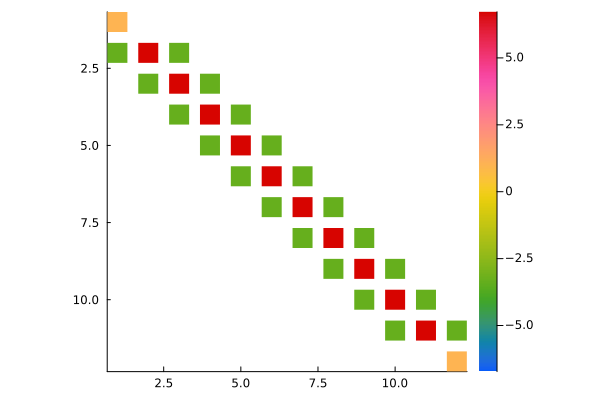

In [21]:
L = laplacian_dirichlet(x)
my_spy(L)

In [24]:
svdvals(L)

12-element Vector{Float64}:
 13.186140990711314
 12.431732687881759
 11.2410304839882
  9.70821397304297
  7.95408920988999
  6.116341867970264
  4.339237535933771
  2.766669174882116
  1.5545799277455488
  0.8986943042687772
  0.5932889424308335
  0.23371273202199902

In [22]:
cond(L)

56.42029373680045

# Solutions

* For now, let's say the right boundary condition is also Dirichlet, $u(1) = b$.

$$ \begin{bmatrix} 1 & 0 & 0 & 0 & 0 \\ \\ & & A_{2:n-1,:} & & \\ \\ \\ 0&0 &0 &0 &0 & 1 \end{bmatrix} \begin{bmatrix} u_1 \\ \\ u_{2:} \\ \\ \\ u_n \end{bmatrix} = \begin{bmatrix} a \\ \\ f_{2:} \\ \\ \\ b \end{bmatrix} . $$

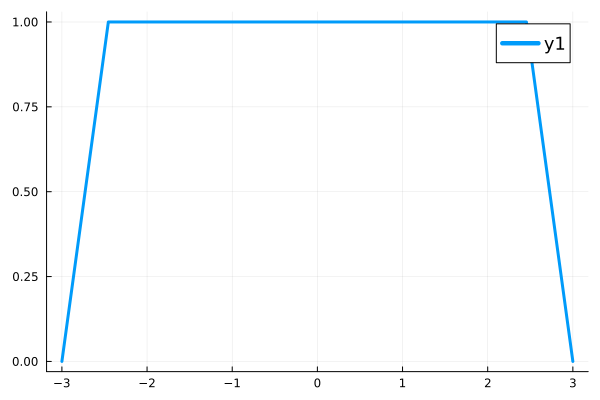

In [25]:
L = laplacian_dirichlet(x)
f = one.(x)
f[1] = 0
f[end] = 0;
plot(x, f)

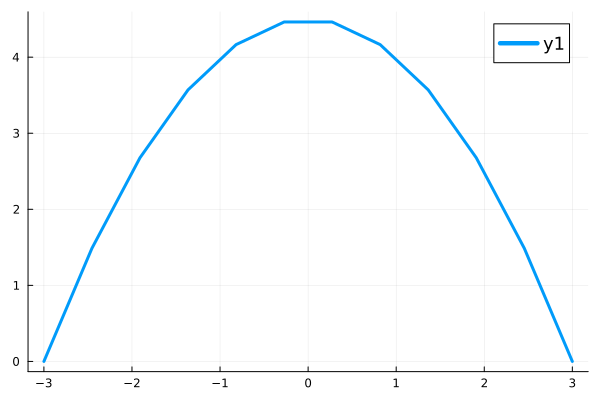

In [26]:
u = L \ f # This is syntax for the stable solution of the system Lu = f.
plot(x, u)

# Discrete "Green's functions"

* Green's function: impulse response
* If we write the LHS of our equation as a linear differential operator $L$ acting on $u$,

$$ Lu(x) = f(x),$$

then the Green's function $G(x, s)$ ($s$ is for "source") is defined as

$$ LG(x, s) = \delta(x - s) $$

* Motivation: once we have $G(x, s)$, we can "build up" solutions from it for different $f$. Why?

Integrating the definition of the Green's function, we get
$$ \int LG(x,s)\,f(s)\,ds=\int \delta (x-s)\,f(s)\,ds=f(x)\, .$$
Due to $L$ only acting on $x$ and being linear, we can bring $L$ out:
$$ L\left(\int G(x,s)\,f(s)\,ds\right)=f(x)\, ,$$
meaning
$$ u(x)=\int G(x,s)\,f(s)\,ds. $$

* Position of the source, $s$, can only be one of the $x_i$ in the linear system
* In matrix form:

$$ LG = I $$

* So $G = L^{-1}$, and the cols of $L^{-1}$ are the "Green's functions" for varying $s$.

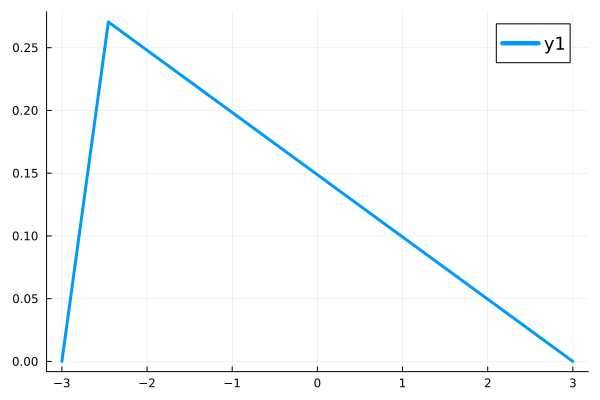

In [27]:
plot(x, inv(L)[:, 2])

# Discrete eigenfunctions

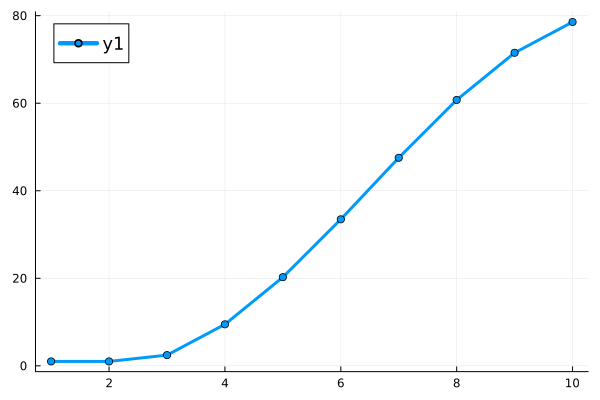

In [29]:
x = LinRange(-1, 1, 10)
L = laplacian_dirichlet(x)
Lambda, V = eigen(L)
plot(Lambda, marker=:circle)

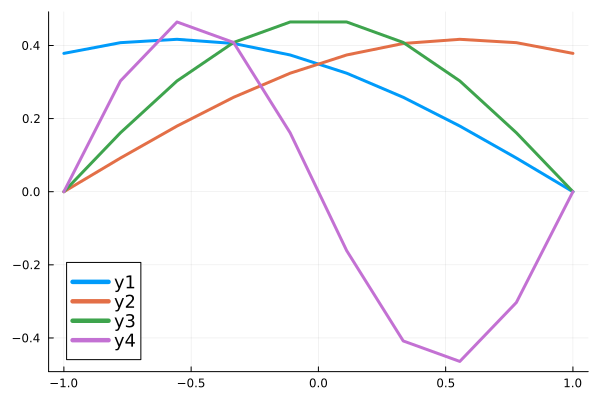

In [30]:
plot(x, V[:, 1:4])

# Outlook on our method

## Pros

* Consistent
* Stable
* Second order accurate (we hope)

## Cons

* Only second order accurate (at best)
* Worse than second order on non-uniform grids
* Worse than second order at Neumann boundaries
* Boundary conditions break symmetry

# Interpolation by Vandermonde matrices

We can compute a polynomial

$$ p(x) = c_0 + c_1 x + c_2 x^2 + \dotsb $$

that assumes function values $p(x_i) = u_i$ by solving a linear system with the Vandermonde matrix.

Constraints:

$$ p(x_1) = c_0 + c_1 x_1 + c_2 x_1^2 + \dotsb = u(x_1) $$
$$ p(x_2) = c_0 + c_1 x_2 + c_2 x_2^2 + \dotsb = u(x_2) $$
$$ \vdots $$

Write as 

$$ \underbrace{\begin{bmatrix} 1 & x_1 & x_2^2 & \dotsb \\
    1 & x_2 & x_3^2 & \dotsb \\
    1 & x_3 & x_3^2 & \dotsb \\
    \vdots & & & \ddots \end{bmatrix}}_V \begin{bmatrix} c_0 \\ c_1 \\ c_2 \\ \vdots \end{bmatrix} = \begin{bmatrix} u_0 \\ u_1 \\ u_2 \\ \vdots \end{bmatrix} .$$

In [31]:
function vander(x, k=nothing)
    if k === nothing
        k = length(x)
    end
    V = ones(length(x), k)
    for j = 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

In [32]:
vander(LinRange(-1, 1, 5))

5×5 Matrix{Float64}:
 1.0  -1.0  1.0   -1.0    1.0
 1.0  -0.5  0.25  -0.125  0.0625
 1.0   0.0  0.0    0.0    0.0
 1.0   0.5  0.25   0.125  0.0625
 1.0   1.0  1.0    1.0    1.0

In [46]:
cond(vander(LinRange(-1, 1, 5)))

23.530908731657536

* The condition number of the Vandermonde matrix can get as large as $10^{16}$ ($\approx 1/\varepsilon_M$ in general) before we start losing digits
* Why? This is only a recently answered research question! See a summary [here](https://cu-comptools.github.io/fall2024/poly_interp.html).

# Fitting a polynomial

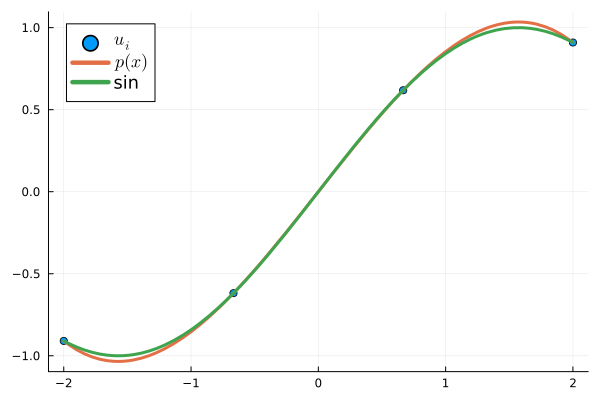

In [33]:
k = 4
x = LinRange(-2, 2, k)
u = sin.(x)
V = vander(x)
c = V \ u
scatter(x, u, label="\$u_i\$", legend=:topleft)
plot!(x -> (vander(x, k) * c)[1,1], label="\$p(x)\$")
plot!(sin, label=sin)

# Differentiating

We're given the coefficients $c = V^{-1} u$ of the polynomial
$$p(x) = c_0 + c_1 x + c_2 x^2 + \dotsb.$$
What is
\begin{align} p(0) &= c_0 \\
p'(0) &= c_1 \\ 
p''(0) &= c_2 \cdot 2\\
p^{(k)}(0) &= c_k \cdot k! .
\end{align}

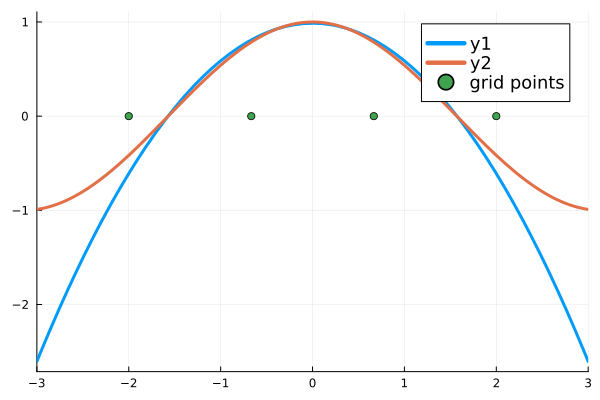

In [43]:
function fdstencil1(source, target)
    "first derivative stencil from source to target"
    x = source .- target
    V = vander(x)
    inv(V)[2, :]' # as a row vector
end
plot([z -> fdstencil1(x, z) * u, cos], xlims=(-3,3))
scatter!(x, 0*x, label="grid points")